In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

### Get data

In [2]:
BondUS = pd.read_csv('BondUS.csv')
BondUS.DAAA = BondUS.DAAA.apply(lambda x: np.nan if x == '.' else x).astype(float)
BondUS.DAAA

0       5.71
1       5.69
2       5.65
3       5.73
4       5.64
        ... 
5005    4.56
5006     NaN
5007    4.55
5008    4.57
5009    4.63
Name: DAAA, Length: 5010, dtype: float64

In [3]:
SMI = pd.read_csv('SMI.csv')
SP500 = pd.read_csv('SP500.csv')
USD_CHF = pd.read_csv('USD_CHF.csv')
BondCH = pd.read_csv('BondCH.csv', sep=';')
BondUS = pd.read_csv('BondUS.csv')


SMI.Date = pd.to_datetime(SMI.Date)
SP500.caldt = pd.to_datetime(SP500.caldt.astype(str).apply(lambda x: x[:4]+"-" + x[4:6]+"-"+x[6:]))
USD_CHF.Date = pd.to_datetime(USD_CHF.Date)
BondCH.date = pd.to_datetime(BondCH.date)
BondUS.DATE = pd.to_datetime(BondUS.DATE)
BondUS.DAAA = BondUS.DAAA.apply(lambda x: np.nan if x == '.' else x).astype(float)

USD_CHF.shape, SP500.shape, SMI.shape, BondCH.shape,BondUS.shape 


((5010, 7), (4617, 4), (4860, 7), (9084, 5), (5010, 2))

In [4]:
USD_CHF.isnull().sum().sum(), SP500.isnull().sum().sum(), SMI.isnull().sum().sum(), BondCH.isnull().sum().sum(), BondUS.isnull().sum().sum()

(96, 0, 222, 0, 204)

In [5]:
m1 = SP500.merge(SMI, left_on='caldt', right_on='Date')
m2 =m1.merge( USD_CHF, left_on='caldt', right_on='Date')
m3 =m2.merge( BondCH, left_on='caldt', right_on='date')
m4 =m3.merge( BondUS, left_on='caldt', right_on='DATE')

idx = m4.Close_x.isnull()
m4 = m4.fillna(method="pad", limit=2)
#m2[idx]
print(m4.isnull().sum().sum())
m4.head(3)

0


,caldt,totval,totcnt,spindx,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,...,Close_y,Adj Close_y,Volume_y,date,2 years,5 years,10 years,20 years,DATE,DAAA
0,2003-09-17,9.364461e+09,500,1025.97,2003-09-17,5402.399902,5424.100098,5386.799805,5398.899902,5398.899902,...,1.3807,1.3807,0.0,2003-09-17,0.862,1.950,2.890,3.700,2003-09-17,5.71
1,2003-09-18,9.489160e+09,500,1039.58,2003-09-18,5392.000000,5425.399902,5381.700195,5422.600098,5422.600098,...,1.3858,1.3858,0.0,2003-09-18,0.850,1.939,2.903,3.716,2003-09-18,5.69
2,2003-09-19,9.461004e+09,500,1036.30,2003-09-19,5445.200195,5445.200195,5385.100098,5387.100098,5387.100098,...,1.3669,1.3669,0.0,2003-09-19,0.869,1.957,2.920,3.765,2003-09-19,5.65


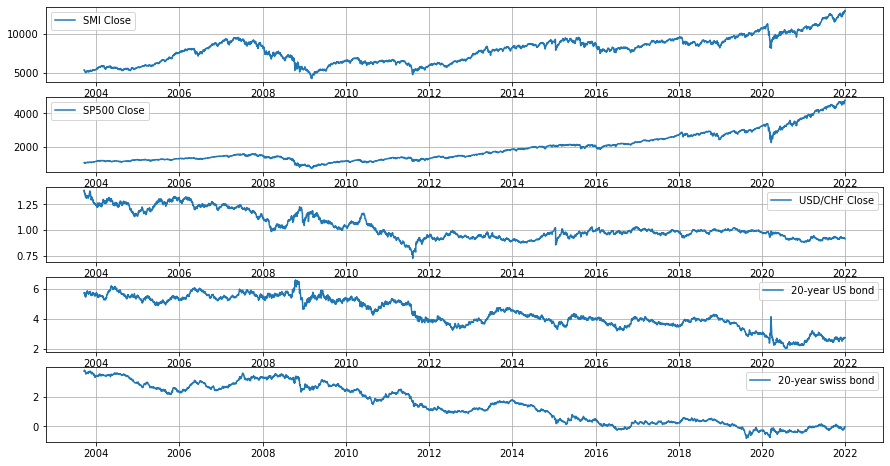

In [6]:
plt.figure(figsize=(15,8))

plt.subplot(5,1,1)
plt.plot(m4.caldt,m4.Close_x, label="SMI Close")
plt.grid()
plt.legend()

plt.subplot(5,1,2)
plt.plot(m4.caldt,m4.spindx, label="SP500 Close")
plt.grid()
plt.legend()

plt.subplot(5,1,3)
plt.plot(m4.caldt,m4.Close_y, label="USD/CHF Close")
plt.grid()
plt.legend()

plt.subplot(5,1,4)
plt.plot(m4.caldt,m4.DAAA, label="20-year US bond")
plt.grid()
plt.legend()

plt.subplot(5,1,5)
plt.plot(m4.caldt,m4['20 years'], label="20-year swiss bond")
plt.grid()
plt.legend()

plt.show()

In [7]:
res = pd.DataFrame()

res['Date'] = m4.caldt
res['SMI'] = m4.Close_x
res['SP500'] = m4.spindx
res['USD_CHF'] = m4.Close_y
res['BondCH'] = m4['20 years']
res['BondUS'] = m4.DAAA

res.to_csv("dataset.csv", index=False)


In [19]:
old = pd.read_csv('dataset.csv')

old =  old.rename(columns={'BondUS':'BondUS_20', 'BondCH':'BondCH_20'})
old

,Date,SMI,SP500,USD_CHF,BondCH_20,BondUS_20
0,2003-09-17,5398.899902,1025.97,1.380700,3.700,5.71
1,2003-09-18,5422.600098,1039.58,1.385800,3.716,5.69
2,2003-09-19,5387.100098,1036.30,1.366900,3.765,5.65
3,2003-09-22,5257.200195,1022.82,1.352800,3.723,5.73
4,2003-09-23,5212.399902,1029.03,1.358700,3.693,5.64
...,...,...,...,...,...,...
4506,2021-12-23,12785.320313,4725.79,0.919440,-0.075,2.74
4507,2021-12-27,12866.900391,4791.19,0.918781,-0.056,2.73
4508,2021-12-28,12970.530273,4786.35,0.917160,-0.056,2.71
4509,2021-12-29,12926.559570,4793.06,0.916900,-0.055,2.70


In [20]:
new = pd.read_csv('dataset_week.csv')

In [22]:
res = new.merge(old[['Date', 'BondCH_20', 'BondUS_20']], left_on='Date', right_on='Date')

In [24]:
res.to_csv("dataset_week_fin.csv", index=False)